# UCI - Breast Tumour Data - Exploratory Data Analysis

### Context Setting :
- Gist of Machine Learning (ML) and the approach to use for Cytological Tumor data-set study 
- Plotting of data and analysis results.

### ML Introduction 

The heart of Machine Learning (ML) is to build an artificial inteliigence agent with the ability to automatically detect patterns in data and possibly make predicitions or perform some task under uncertainty. Referring to N.Silver's book, we are finding the signal in the noise. Broadly, the three constituents of ML are Unsupervised, Supervised and Reinforcement Learning. 

**Supervised** Learning: Correct-output/Result is available for a given Training data set (input, correct output)


**Reinforcement** Learning : No correct output is explicityly available in training data set, only some possible output together with a "Measure of how good the output" is available (input, some output, grade for this output)


**Unsupervised** Learning: No output in Training data, only input examples given. Task is to find the "Patterns & Structures" in input-data. Can be used as a precursor to Supervised Learning

Aims to uncover interesting patters and structure in the data. 


## Objective

1.	Perform Exploratory Data Analysis (EDA)
    2.	Show the degree of co-relation among the variable and result 
    3.	Perform Statistical computations like: Mean, total count of valid-values etc.
4.	Identify the High/Low predictors for Result:
    Determine the variables which highly affect the result
5.	Classify the Tumour (Benign or Maligmant) using ML algorithm (i.e. create Predictive model)


## Learning from Data is Machine Learning (ML)

### Statistical Approach  Vs ML

**Statistics - Idealized Model + Extensive Analysis + As good as Experimental Design (hypothesis)**

** Machine & Deep Learning :**
- Less Restrictive
- Weak Results
- Broadly Applicable



In [1]:
import urllib2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import seaborn as sns
sns.set(color_codes=True)

from scipy import stats, integrate
plt.style.use('ggplot')
import collections
import json
import os
import itertools
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from pandas.tools.plotting import scatter_matrix

import pydot
#%pylab inline
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#!curl'http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00330/newHIV-1_data.zip > t1.zip
features = ['Sample ID',
            'Clump thickness',
            'Uniformity cell size',
            'Uniformity cell shape',
            'Marginal adhesion',
            'Single epithelial cell size',
            'Bare nuclei',
            'Bland chromatin',
            'Normal nucleoli',
            'Mitoses',
            'Result']
#raw_df = pd.read_csv('breast-cancer-wisconsin.data', names=features, header=None)

In [3]:
with open \
  ('breast-cancer-wisconsin.data', 'r') as f:
        raw_df = pd.read_csv(f, names=features, header=None)

In [4]:
#Al *** To reset Cancer Data frame start from this cell
cancer_df = raw_df.copy()
print "The Shape of the loaded data is:", cancer_df.shape

The Shape of the loaded data is: (699, 11)


### The Result column values 2 indicates Benign & 4 indicates Malignant Tomour 

In [5]:
cancer_df.head(5)

,Sample ID,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Result
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### These are Cytological Attributes 
**Measure of External appearance and Internal Chromosome appearance in 9 different Scales (as 1 means Normal & 10 most Abnormal)**

In [6]:
for col in features[1:]:
    print col, '(', cancer_df[col].dtype, ')','----', cancer_df[col].unique(), '\n'

Clump thickness ( int64 ) ---- [ 5  3  6  4  8  1  2  7 10  9] 

Uniformity cell size ( int64 ) ---- [ 1  4  8 10  2  3  7  5  6  9] 

Uniformity cell shape ( int64 ) ---- [ 1  4  8 10  2  3  5  6  7  9] 

Marginal adhesion ( int64 ) ---- [ 1  5  3  8 10  4  6  2  9  7] 

Single epithelial cell size ( int64 ) ---- [ 2  7  3  1  6  4  5  8 10  9] 

Bare nuclei ( object ) ---- ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6'] 

Bland chromatin ( int64 ) ---- [ 3  9  1  2  4  5  7  8  6 10] 

Normal nucleoli ( int64 ) ---- [ 1  2  7  4  5  3 10  6  9  8] 

Mitoses ( int64 ) ---- [ 1  5  4  2  3  7 10  8  6] 

Result ( int64 ) ---- [2 4] 



In [7]:
#Al *** Identifying incorrect data element (i.e. samples with Bare Nuclei value as '?')
noData_Bare_Nuclei_df = cancer_df[cancer_df['Bare nuclei'] =='?']
noData_Bare_Nuclei_df.head(5)

,Sample ID,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Result
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [8]:
#Al *** Data Cleansing - dropping samples with Bare Nuclei value as '?' 
clean_data_df = cancer_df[cancer_df['Bare nuclei'] !='?']
#cancer_df['Bare nuclei'].value_counts()

In [9]:
cancer_df = clean_data_df.copy()

In [ ]:
#Al *** Ensuring data is numeric and ready for mathematical computations
cancer_df.ix[ :0,10] = cancer_df.ix[ : 0,10].apply(lambda x : pd.to_numeric(x, errors='coerce'))
#cancer_df.info(verbose=False)
cancer_df = cancer_df.set_index("Sample ID")
cancer_df.head(5)

In [11]:
stat_df = cancer_df.reindex()
stat_df = stat_df.drop('Result', axis=1)
#stat_df = stat_df.drop('Sample ID', axis=1)
stat_df.describe()

,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bland chromatin,Normal nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


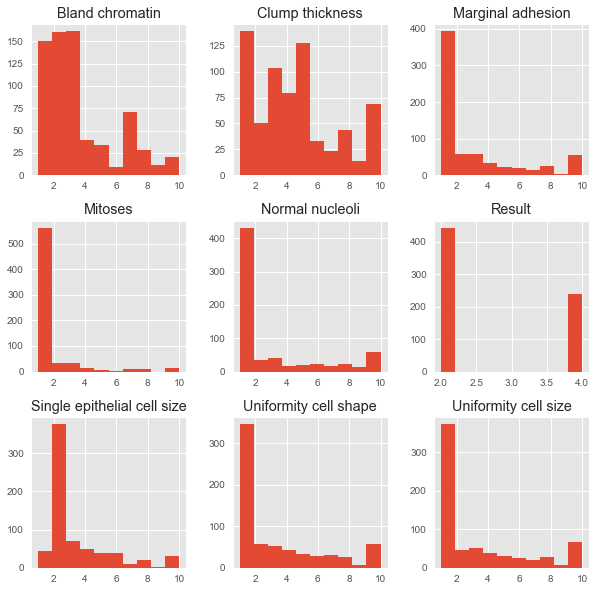

In [12]:
#AL *** Creating a Histogram of various feature's frquency of occurance
cancer_df.hist(figsize=(10,10));

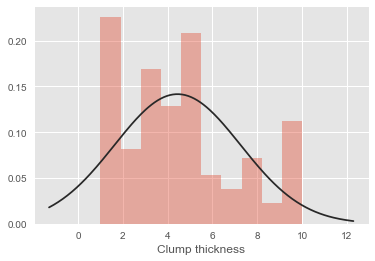

In [13]:
#AL *** Showing sample distribution of Clump Thickness over a normal distribution curve
#sns.distplot(cancer_df['Clump thickness'], hist=True, fit=stats.norm);
sns.distplot(cancer_df['Clump thickness'], kde=False, fit=stats.norm);

In [14]:
#AL *** creating a box plot for representation of statistical description of values
#cancer_df.plot.box(return_type='axes', figsize=(12,10), rot=45)

In [15]:
# #AL ** Show the degree of correaltion among features
# sns.set(context="talk", font="monospace")
# map_df = cancer_df.drop('Result', axis=1)
# f, ax = plt.subplots(figsize=(8, 8))  # Set up the matplotlib figure
# #sns.heatmap(cancer_df.corr(), vmin=0, vmax=1, square=True)  # Draw the heatmap using seaborn
# sns.heatmap(cancer_df.corr(), square=True)  # Draw the heatmap using seaborn
# f.tight_layout()

### Plotting only part of correlation matrix (another option) 

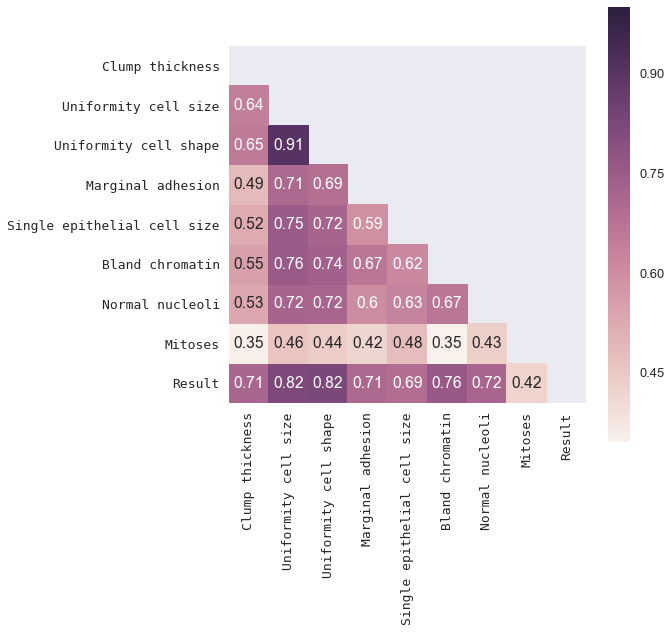

In [16]:
sns.set(context="talk", font="monospace")
f, ax = plt.subplots(figsize=(8, 8))   # Set up the matplotlib figure

corr = cancer_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask,  square=True);

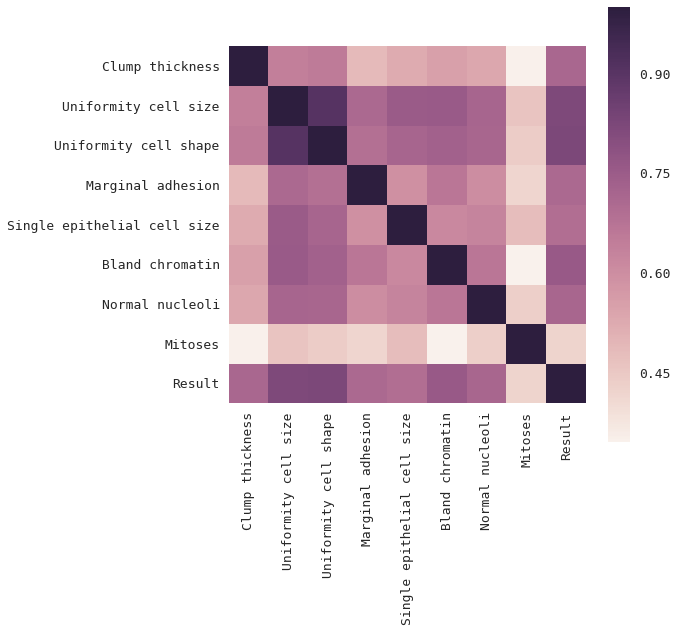

In [17]:
#AL ** Show the degree of correaltion among features
sns.set(context="talk", font="monospace")
map_df = cancer_df.drop('Result', axis=1)
f, ax = plt.subplots(figsize=(8, 8))  # Set up the matplotlib figure
#sns.heatmap(cancer_df.corr(), vmin=0, vmax=1, square=True)  # Draw the heatmap using seaborn
sns.heatmap(cancer_df.corr(), square=True)  # Draw the heatmap using seaborn
# f.tight_layout()

In [ ]:
#cancer_df.plot.scatter(x='Clump thickness', y='Single epithelial cell size', alpha=0.05, edgecolors='none');

In [ ]:
#cancer_df.plot.scatter(y='Uniformity cell size', x='Uniformity cell shape', alpha=0.05, edgecolors='none');

In [18]:
#Scatter Matrix 

#scatter_matrix(t1_df, alpha=0.5, figsize=(15,15), diagonal='hist', edgecolors='none')
#scatter_matrix(map_df, alpha=0.1, figsize=(15,15), diagonal='kde', edgecolors='none');
#cancer_df.info()

In [18]:
#AL  **** A simple prediction algorithm using Decision-Tree (Supervised machine-learning method as outcome is known)
# Creating a df to use for a decision tree classification algorithm
dt_df = cancer_df.copy()
dt_df.reset_index(inplace=True)
dt_df.drop('Sample ID',axis=1,inplace=True)
dt_df = dt_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
dt_df.head(5)

,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Result
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
y = dt_df['Result']         #label vector
x = dt_df.iloc[:,0:9]       #feature/predictors/dimensions vector

### Splitting data into Train(80%) & Test(20%) set, this method shuffles the data set before splitting 

In [20]:
train_x, test_x, train_y, test_y = train_test_split(x.values, y.values, train_size=545, random_state=25)
print 'The Feature training set dimentions are : ', train_x.shape
print 'The Label training set dimentions are : ', train_y.shape
print 'The Feature validation set dimentions are : ', test_x.shape
print 'The Label validation set dimentions are : ', test_y.shape

The Feature training set dimentions are :  (545, 9)
The Label training set dimentions are :  (545,)
The Feature validation set dimentions are :  (138, 9)
The Label validation set dimentions are :  (138,)


In [21]:
# Fit the DT classifier
dt = DecisionTreeClassifier(min_samples_split=10,random_state=25)    #decision trees instance with parameters
dt.fit(train_x, train_y);   #train the decision tree with the training data and results vector

In [22]:
predicted_y = dt.predict(test_x)
# predicted_y.shape
#rprt = classification_report(test_y, predicted_y)
#print rprt

In [23]:
accuracy = accuracy_score(test_y, predicted_y)
print  'The Raw Accuracy score using DT Classifier %s' %accuracy
print  'The Error rate is %s percentage' %((1-accuracy)*100)

The Raw Accuracy score using DT Classifier 0.920289855072
The Error rate is 7.97101449275 percentage


In [24]:
def visualize_tree(tree, features_X):
    """Create tree png using graphviz; Args - tree(scikit-learn DecsisionTree) ; feature_names (features list) """
    with open("result_tree.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=features_X)
        
    command = ["dot", "-Tpng", "result_tree.dot", "-o", "result_tree.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

### Note that "Mitoses" follows the Power Law distribution

In [25]:
visualize_tree(dt, features[1:10])

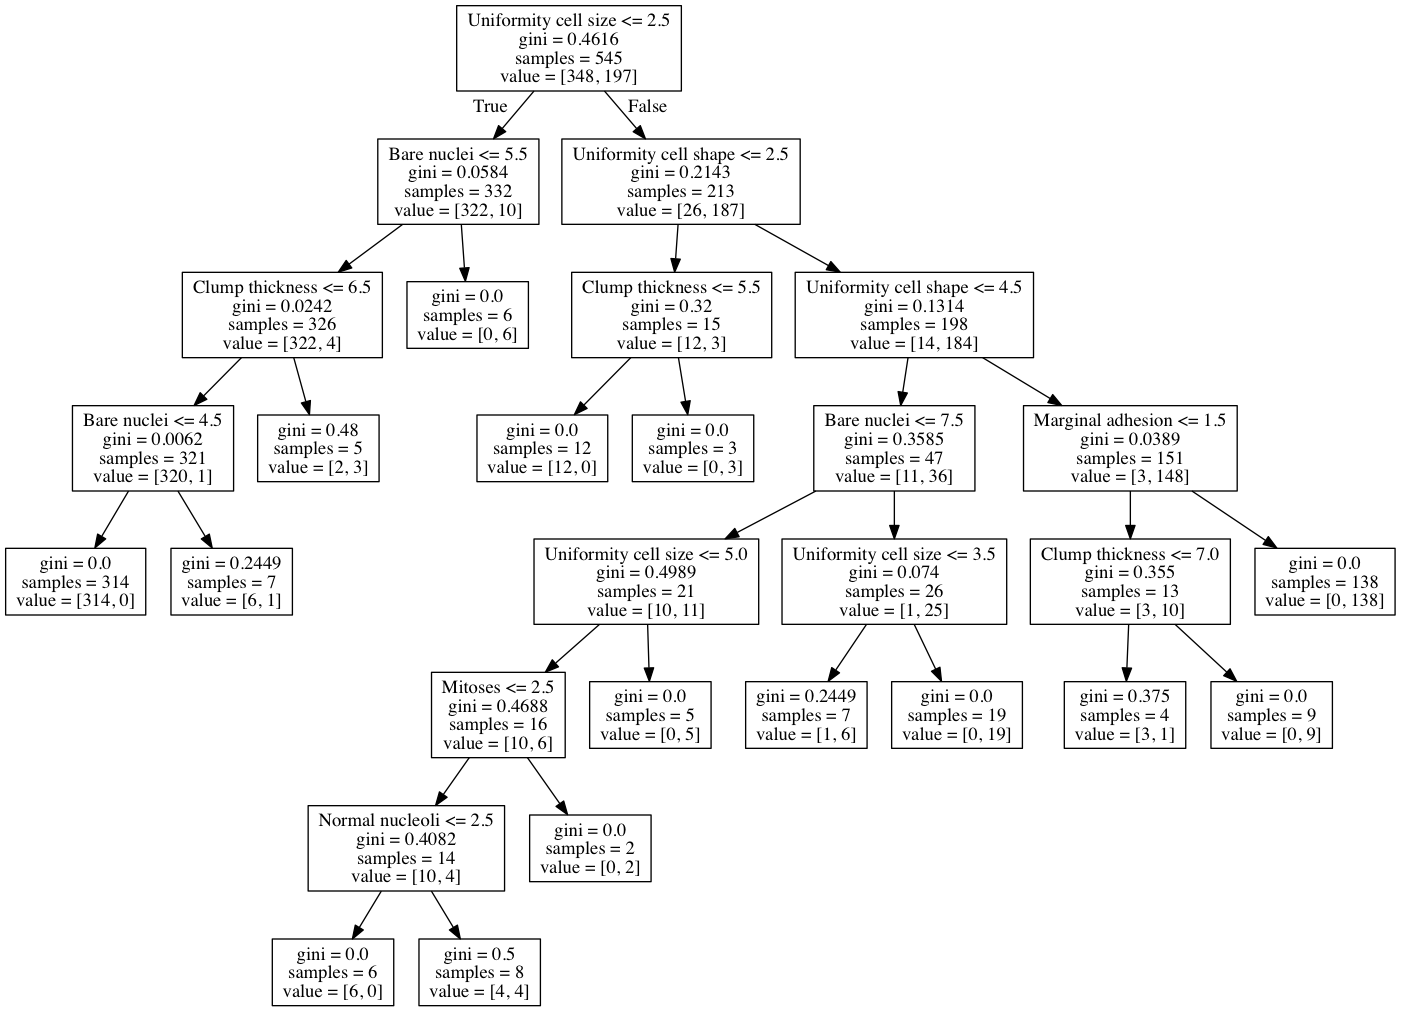

In [26]:
Image(filename='result_tree.png') 

In [27]:
testX_df = pd.DataFrame(test_x, columns=features[1:10])
testY_df = pd.DataFrame(test_y, columns=['Result'])
predictedY_df = pd.DataFrame(predicted_y, columns=['Predicted Result'])
merge_df = pd.concat([testX_df, testY_df, predictedY_df], axis=1)
merge_df.head(5)

,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Result,Predicted Result
0,9,4,5,10,6,10,4,8,1,4,4
1,3,1,1,1,3,1,2,1,1,2,2
2,1,1,1,1,2,1,3,1,1,2,2
3,3,1,1,1,1,1,2,1,1,2,2
4,3,1,1,3,1,1,3,1,1,2,2


In [28]:
diff_df = merge_df[ ( merge_df['Result'] != merge_df['Predicted Result'] ) ]
print "Mismatch in Result Vs Predicted Result", diff_df.shape
diff_df

Mismatch in Result Vs Predicted Result (11, 11)


,Clump thickness,Uniformity cell size,Uniformity cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Result,Predicted Result
17,5,4,4,5,7,10,3,2,1,2,4
23,6,1,3,1,4,5,5,10,1,4,2
25,5,3,3,4,2,4,3,4,1,4,2
26,6,9,7,5,5,8,4,2,1,2,4
46,2,5,3,3,6,7,7,5,1,4,2
58,8,4,6,3,3,1,4,3,1,2,4
59,10,4,3,1,3,3,6,5,2,4,2
64,1,1,1,1,2,10,3,1,1,2,4
73,5,3,5,1,8,10,5,3,1,4,2
100,3,4,5,3,7,3,4,6,1,2,4


### Creating Confusion Matrix

In [29]:
#pd.DataFrame( confusion_matrix(test_y, predicted_y) )

In [30]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.OrRd):
    """ This function prints and plots the confusion matrix. """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

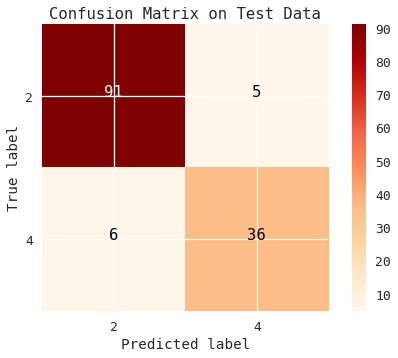

In [31]:
cnf_matrix = confusion_matrix(test_y, predicted_y)  # Creating confusion matrix
#np.set_printoptions(precision=2)
plt.figure(figsize = (7,5))
plot_confusion_matrix(cnf_matrix, classes=[2,4], title='Confusion Matrix on Test Data')

plt.show()

#### True Negative = 91
   A Benign case correctly classified(i.e. predicted) as Benign 
   (i.e. a patient does NOT have cancer and predicted negative)
#### True Positive = 36
   A Malignant case correctly classified as Malignant
   (i.e. a patient have cancer and predicted positive)
#### False Positive = 5
   A Benign case incorrectly classified as Malignant
   (i.e. a patient does NOT have cancer and predicted positive)
#### False Negative = 6
   A Malignant case incorrectly classified as Benign
   (i.e. a patient have cancer and predicted negative)
##### Overall objective is to reduce the cases of False Negative(FN) i.e. not to miss any cancer (positive) cases from diagnosis. In this case patient actually have cancer but it was undetected. This is a worst case scenario for cancer diagnosis.